In [1]:
import config
import numpy as np
import pandas as pd

# Baseline: Training datasets and store
- Time 1 (1 day)
- Time 10 (3 days)
- Time 14 (4 days)
- Time 18 (5 days)
- Time 22 (6 days)

In [2]:
import Test_without_Training

'''if __name__ == "__main__":
    for K in [1, 6, 10, 14, 18, 22, 26]:
        trainer = Test_without_Training.TremorModelTrainer(config, subject="Hunmin")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../Results/Baseline_results_train_with_{K}data_H.csv')'''

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨

Dataset 1/34 - Session Exp_2025-05-27/E8331D05289A/
(8539, 4, 14, 1) (8539,)
Dataset 2/34 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 90.41%
Maximum validation accuracy : 96.51%
Accuracy of test dataset using model V0: 95.3488%
Dataset 3/34 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 76.9446%
Dataset 4/34 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 85.2548%
Dataset 5/34 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Accuracy on unseen dataset: 85.5470%
Dataset 6/34 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Accuracy on unseen dataset: 71.4865%
Dataset 7/34 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Accuracy on unseen dataset: 69.9767%
Dataset 8/34 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Accuracy on unseen dataset: 77.9039%
Dataset 9/34 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Accuracy on unseen dataset: 69.9791%
Dataset 10/34 - Session Exp_2025-0

In [2]:
baseline1_csv_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce/github/Results/Baseline_results_train_with_1data_H.csv'
baseline2_csv_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce/github/Results/Baseline_results_train_with_6data_H.csv'
baseline3_csv_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce/github/Results/Baseline_results_train_with_10data_H.csv'
baseline4_csv_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce/github/Results/Baseline_results_train_with_14data_H.csv'
baseline5_csv_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce/github/Results/Baseline_results_train_with_18data_H.csv'
baseline6_csv_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce/github/Results/Baseline_results_train_with_22data_H.csv'
baseline7_csv_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce/github/Results/Baseline_results_train_with_26data_H.csv'

SUBJECT = "Hunmin"
baseline_K = ['1', '6', '10', '14', '18', '22', '26']
baselines = [baseline1_csv_path, baseline2_csv_path,  baseline3_csv_path,  baseline4_csv_path, baseline5_csv_path, baseline6_csv_path, baseline7_csv_path]

# Training from scratch in every data
- Performance should be high
- Objective


Dataset 1/34 - Session Exp_2025-05-27/E8331D05289A/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 80.84%
Maximum validation accuracy : 91.68%

Dataset 2/34 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 84.45%
Maximum validation accuracy : 86.87%

Dataset 3/34 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.05%
Maximum validation accuracy : 92.64%

Dataset 4/34 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.41%
Maximum validation accuracy : 92.83%

Dataset 5/34 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 82.96%
Maximum validation accu

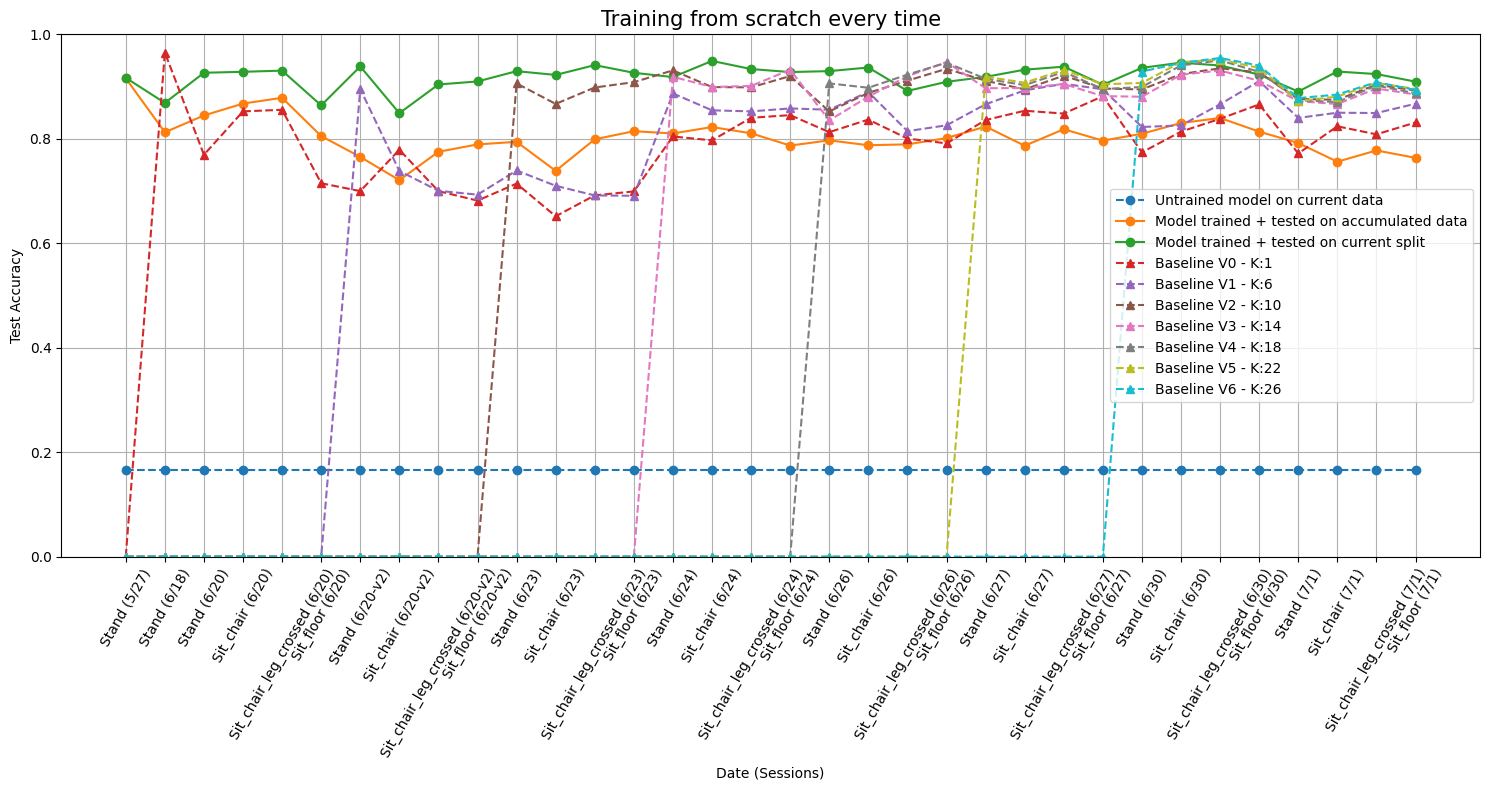

Average of acc without training anything (should be random): 11.11%
Average of acc using previous test data after training: 91.88%
Average of acc using current test data after training: 80.39%
Baseline K-1: 79.54%
Baseline K-6: 82.45%
Baseline K-10: 90.27%
Baseline K-14: 89.89%
Baseline K-18: 91.03%
Baseline K-22: 91.33%
Baseline K-26: 91.67%


In [3]:
import Training_from_scratch

prog_trainer = Training_from_scratch.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)
prog_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")

# Transfer Learning - Incremental : Model is cumulatively updated


Dataset 1/34 - Session Exp_2025-05-27/E8331D05289A/
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 84.65%
Maximum validation accuracy : 92.05%

Dataset 2/34 - Session Exp_2025-06-18/E9AD0E7DCC2B/

Initial Test Accuracy: 84.34%
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 83.39%
Maximum validation accuracy : 87.24%
Accuracy Improvement: 2.90%
	 ===> Positive

Dataset 3/34 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/

Initial Test Accuracy: 82.04%
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 75.66%
Maximum validation accuracy : 82.6%
Accuracy Improvement: 0.56%
	 ===> Positive

Dataset 4/34 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/

Initial Test Accuracy: 87.69%
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 80.91%
Maximum validation accuracy : 89.53%
Accuracy Improvement: 1.83%
	 

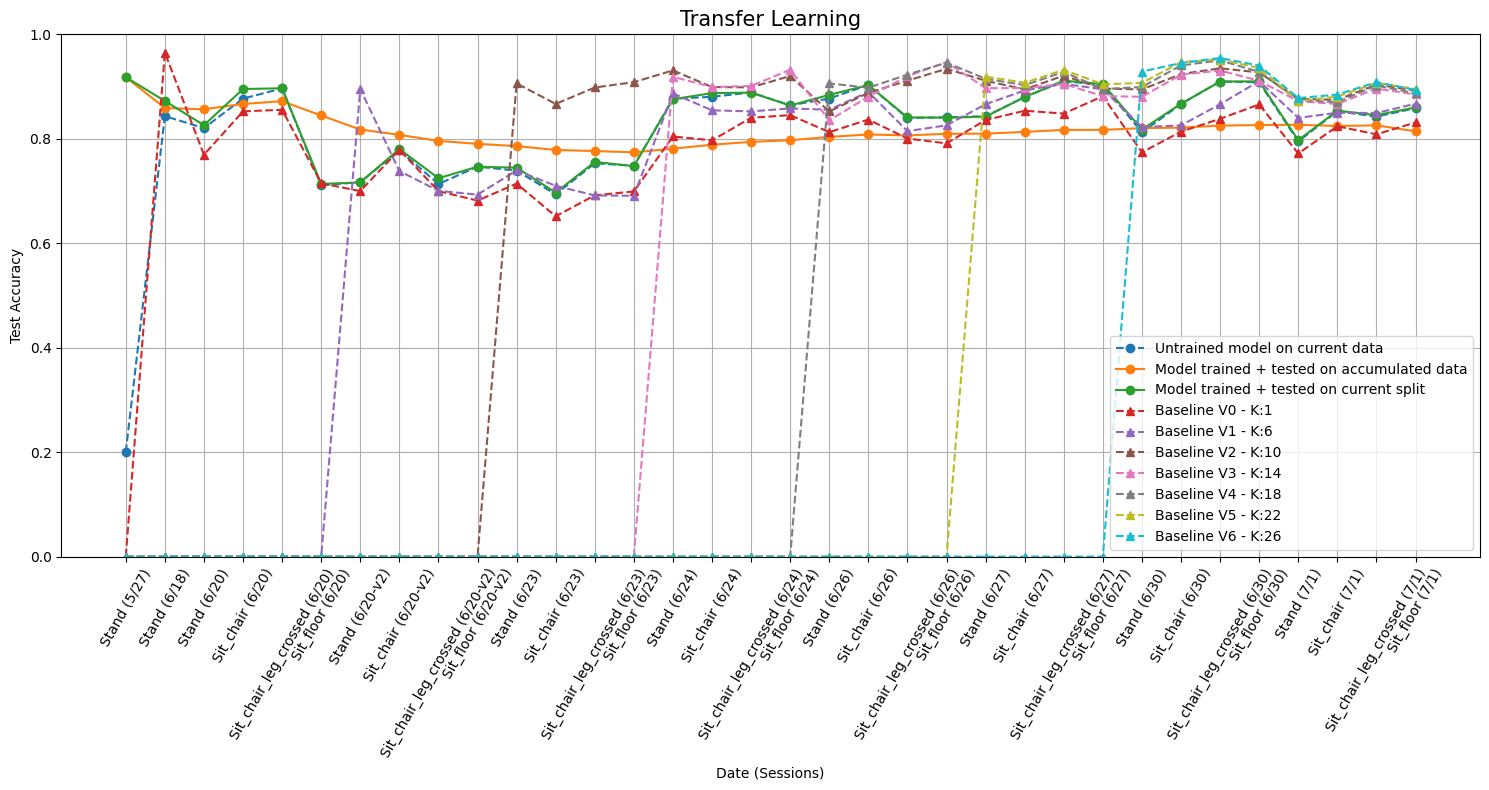

Average of acc without training this data (init; unseen) - incrementally trained model with previous datasets: 81.15%
Average of acc using previous test data after training (with increment): 81.69%
Average of acc using current test data after training (with increment): 83.58%
Baseline K-1: 79.54%
Baseline K-6: 82.45%
Baseline K-10: 90.27%
Baseline K-14: 89.89%
Baseline K-18: 91.03%
Baseline K-22: 91.33%
Baseline K-26: 91.67%


In [4]:
import Transfer_Learning

tl_trainer = Transfer_Learning.TransferLearningTrainer(config, subject=SUBJECT, increment_true_false="True")
Init_acc_all, Prev_acc_all, Trained_acc_all = tl_trainer.run(plot_learning_curve=False)   #True if want to see convergence for each session round
tl_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training this data (init; unseen) - incrementally trained model with previous datasets: {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training (with increment): {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training (with increment): {np.mean(x)*100:.2f}%")

for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")

# Few-shot Learning (MAML) adaptation

Dataset 1/34 - Session Exp_2025-05-27/E8331D05289A/
Epoch 1: Loss=1.5666, Acc=0.5700
Epoch 11: Loss=1.4110, Acc=0.5700
Epoch 21: Loss=1.6432, Acc=0.5800
Epoch 31: Loss=1.7664, Acc=0.7000
Epoch 41: Loss=1.8621, Acc=0.7100
Dataset 2/34 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Dataset 3/34 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Dataset 4/34 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Dataset 5/34 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Dataset 6/34 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Dataset 7/34 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Dataset 8/34 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Dataset 9/34 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Dataset 10/34 - Session Exp_2025-06-20-v8/E9AD0E7DCC2B/
Dataset 11/34 - Session Exp_2025-06-23-v1/E9AD0E7DCC2B/
Dataset 12/34 - Session Exp_2025-06-23-v2/E9AD0E7DCC2B/
Dataset 13/34 - Session Exp_2025-06-23-v3/E9AD0E7DCC2B/
Dataset 14/34 - Session Exp_2025-06-23-v4/E9AD0E7DCC2B/
Dataset 15/34 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Datase

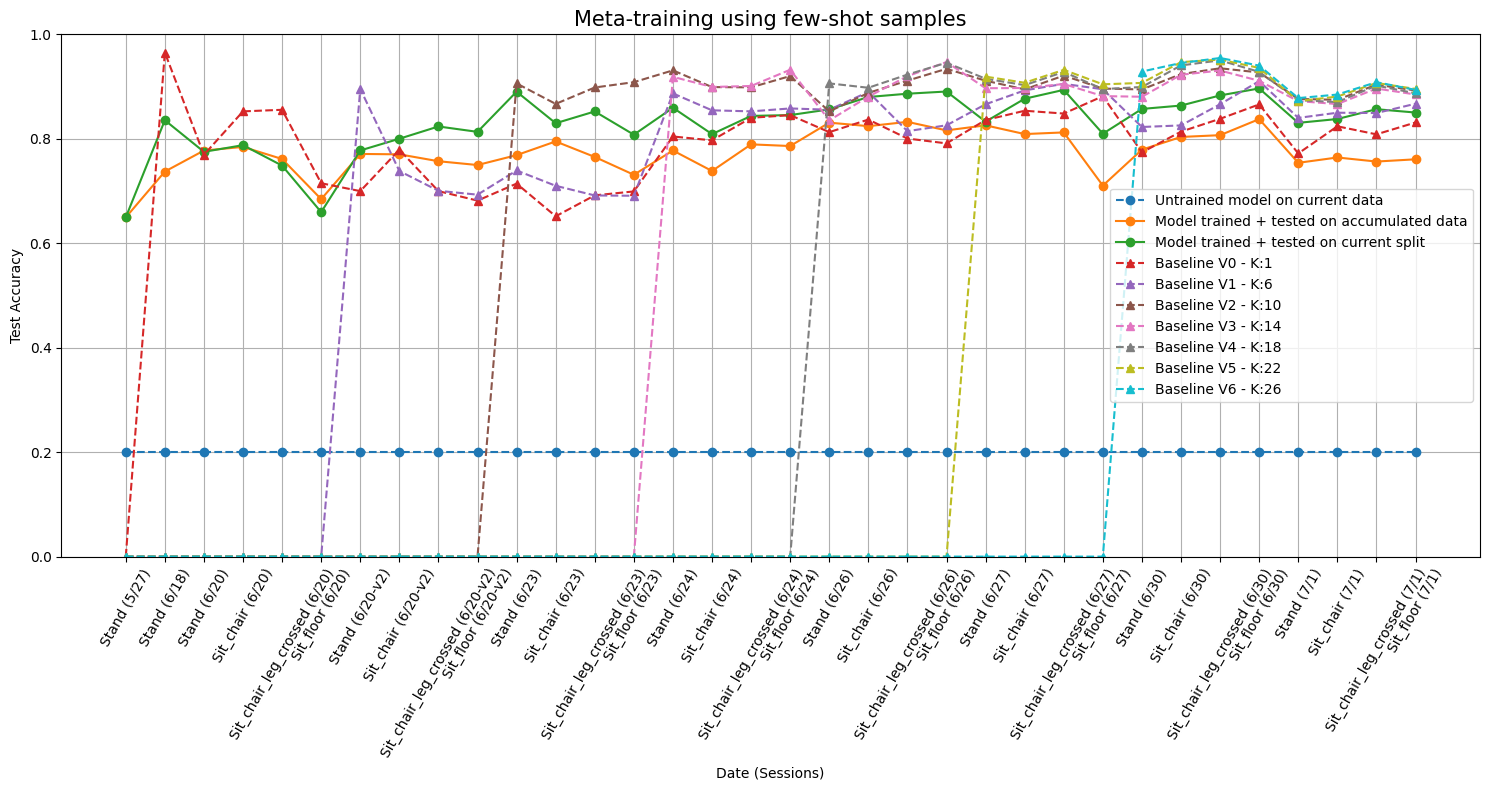

Average of acc without training anything (should be random): 20.00%
Average of acc using previous test data after training: 77.40%
Average of acc using current test data after training: 82.97%
Baseline K-1: 79.54%
Baseline K-6: 82.45%
Baseline K-10: 90.27%
Baseline K-14: 89.89%
Baseline K-18: 91.03%
Baseline K-22: 91.33%
Baseline K-26: 91.67%


In [5]:
import Few_shot_Learning

trainer = Few_shot_Learning.MAMLProgressiveTrainer(config, subject=SUBJECT, K_shot=10, query_size=100)
Init_acc_all, Prev_acc_all, Trained_acc_all = trainer.run()
trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")

for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")

# Continual Learning (EWC)

Dataset 1/34 - Session Exp_2025-05-27/E8331D05289A/
Start Training (total epochs: 20)...
Finish Training! (Model is saved)
Maximum training accuracy : 86.06%
Maximum validation accuracy : 94.27%
Dataset 2/34 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Dataset 3/34 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Dataset 4/34 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Dataset 5/34 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Dataset 6/34 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Dataset 7/34 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Dataset 8/34 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Dataset 9/34 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Dataset 10/34 - Session Exp_2025-06-20-v8/E9AD0E7DCC2B/
Dataset 11/34 - Session Exp_2025-06-23-v1/E9AD0E7DCC2B/
Dataset 12/34 - Session Exp_2025-06-23-v2/E9AD0E7DCC2B/
Dataset 13/34 - Session Exp_2025-06-23-v3/E9AD0E7DCC2B/
Dataset 14/34 - Session Exp_2025-06-23-v4/E9AD0E7DCC2B/
Dataset 15/34 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Dataset 16/34 - Session Exp_2025

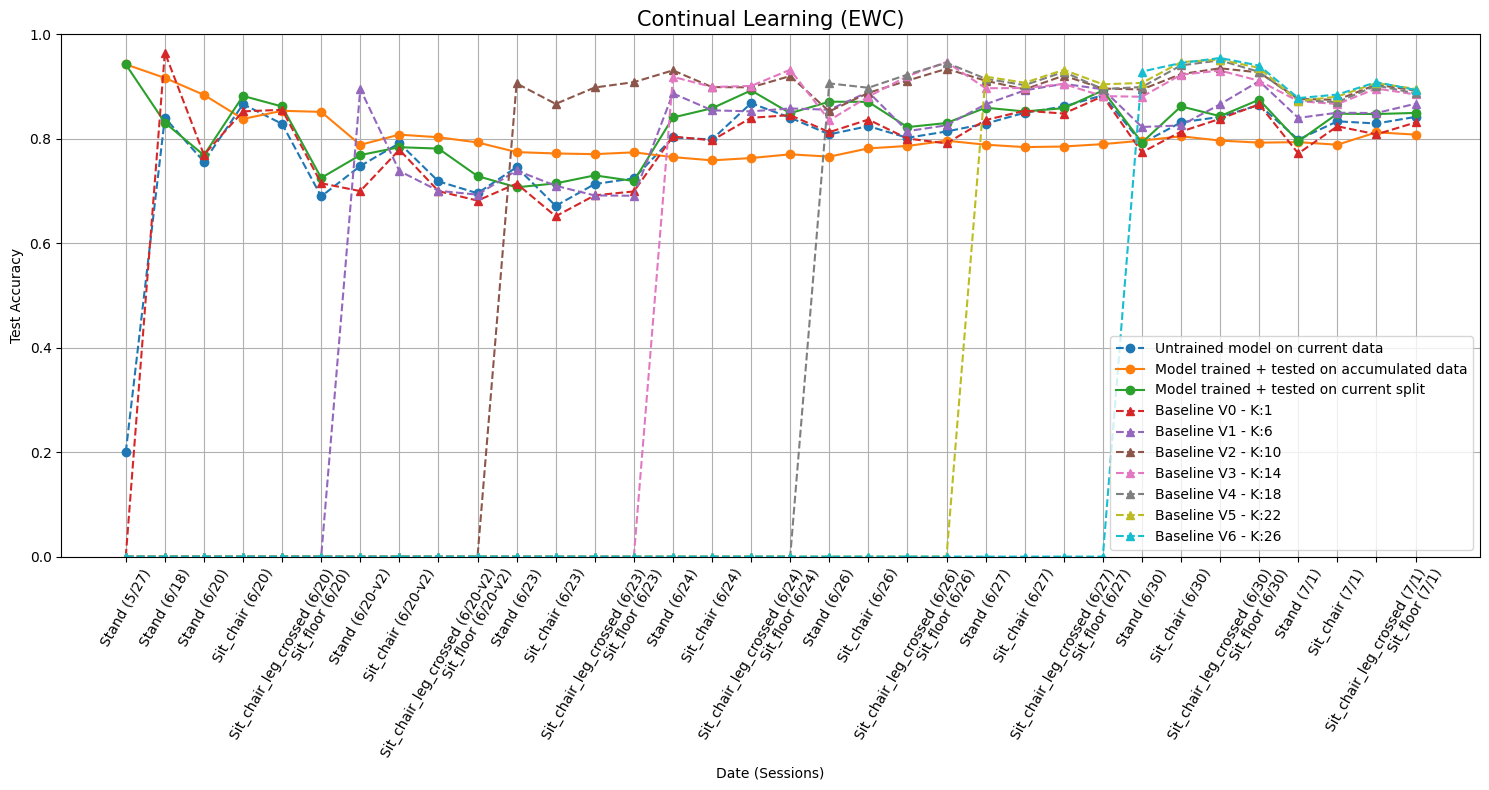

Average of acc without training this data (init; unseen): 78.25%
Average of acc using previous test data after training: 80.29%
Average of acc using current test data after training: 82.22%
Baseline K-1: 79.54%
Baseline K-6: 82.45%
Baseline K-10: 90.27%
Baseline K-14: 89.89%
Baseline K-18: 91.03%
Baseline K-22: 91.33%
Baseline K-26: 91.67%


In [6]:
import Continual_Learning_EWC_

cl_trainer = Continual_Learning_EWC_.ContinualLearningTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = cl_trainer.run()
cl_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training this data (init; unseen): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")

for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")